In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Loading and Preprocessing

##### Load the California Housing dataset using the fetch_california_housing function from sklearn.Convert the dataset into a pandas DataFrame for easier handling.Handle missing values (if any) and perform necessary feature scaling (e.g., standardization).Explain the preprocessing steps you performed and justify why they are necessary for this dataset.


In [ ]:
#Load the California Housing dataset using the fetch_california_housing function from sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
df.info() # extract basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
# to find the duplicates in the dataset.
df.duplicated().sum()

0

✅There is no duplicates in this dataset

In [ ]:
df.isnull().sum() #to check the missing values in the dataset

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


✅ The dataset contains no missing values

In [ ]:
df.describe() # analyse the statstical measures of the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


There is no major difference between mean and median of different columns except 'Population' and 'AveOccup';only minor difference are there.There may be a chance of outliers.

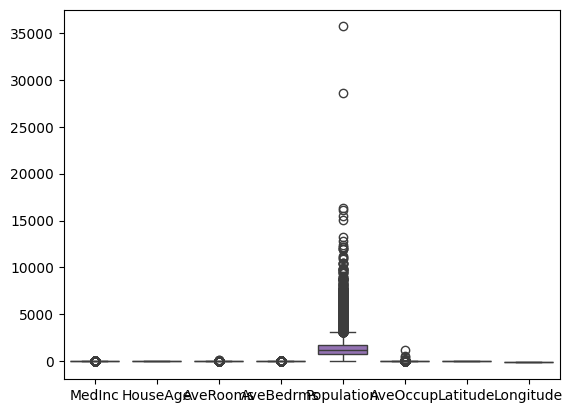

In [ ]:
#checking the probability of outliers
sns.boxplot(data=df)
plt.show()

In [ ]:
#checking the skewness of the data
skewness = df.skew()
skewness

,0
MedInc,1.646657
HouseAge,0.060331
AveRooms,20.697869
AveBedrms,31.316956
Population,4.935858
AveOccup,97.639561
Latitude,0.465953
Longitude,-0.297801


✅ The data is positively skewed in most of the columns

In [ ]:
#to find the outliers using IQR method
num=df.select_dtypes("number")
for col in num:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(outliers)
  print("\n")

        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20503   8.2787      27.0  6.935065   1.103896       243.0  3.155844     34.33   

       Longitude  
0       

The data have no outliers;So that we got an empty DataFrame for outliers

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
df["Target"]= housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


In [ ]:
#to find the correlation between the target and other features
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


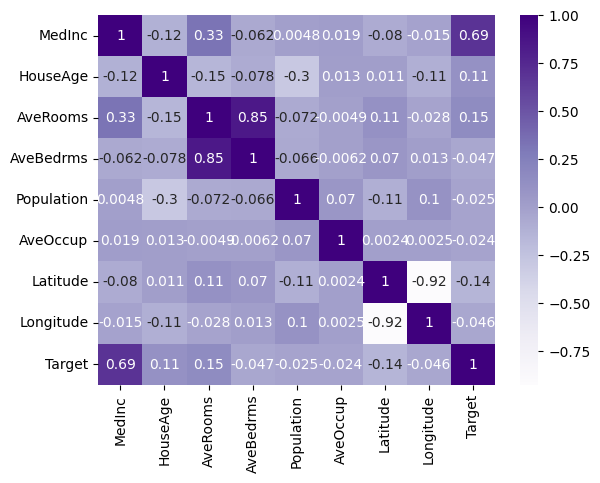

In [ ]:
#drawing a heatmap based on correlation
sns.heatmap(corr,annot=True,cmap="Purples")
plt.show()

✅ Target has a strong positive correlation with 'MedIc' compared to other features

In [ ]:
x=df.drop("Target",axis=1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y=df["Target"]
y

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
#feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_scaler=std_scaler.fit_transform(x)
x_scaler

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train.shape

(15480, 8)

In [ ]:
x_test.shape

(5160, 8)

In [ ]:
y_train.shape

(15480,)

In [ ]:
y_test.shape

(5160,)

## 2) Regression Algorithm Implementation

### Implement the following regression algorithms:
*   Linear Regression
*   Decision Tree Regressor
*   Random Forest Regressor
*   Gradient Boosting Regressor
*   Support Vector Regressor (SVR)

For each algorithm:
*   Provide a brief explanation of how it works.
*   Explain why it might be suitable for this dataset.






In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
#linear regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

This tells us that the linear regression model (linreg) to learn the relationship between the features (x_train) and the target variable (y_train) from the training data

##### Linear regression can be a good starting point for this dataset :-
###### It's a relatively simple and interpretable model.
###### It can be effective if there's a linear relationship between the features and the target variable (house price). This was previously verified in the code by plotting a heatmap of the correlations. There is a strong correlation between Median Income ('MedIc') and house price ('Target').

In [ ]:
inreg_y_pred = linreg.predict(x_test)
inreg_y_pred

array([1.15321999, 1.67602112, 3.09088397, ..., 2.40878825, 0.86185618,
       0.72630824])

In [ ]:
#decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

A Decision tree is a supervised learning algorithm used for classification and regression tasks.The structure resembles a tree with nodes representing decisions,branches represents choices,and leaves representing outcomes or predictions.

Suitability for the California Housing Dataset: Handles Non-linear Relationships,it can provide insights into which features are most important for predicting house prices,no feature Scaling required

In [ ]:
dtreg_y_pred = dt_reg.predict(x_test)
dtreg_y_pred

array([1.654, 1.594, 2.041, ..., 2.556, 0.624, 0.612])

In [ ]:
#random Forest Regressor
rfreg = RandomForestRegressor()
rfreg.fit(x_train, y_train)

RandomForestRegressor()

* Random Forest is an ensemble learning method that builds multiple Decision Tress and averages their predictions to improve accuracy and reduce overfitting.Each tree is built on a random subset of data and features.
* Suitability : Reduces overlifting compared to a single decision Tree.Handles non-linear relationships effectively.



In [ ]:
rfreg_y_pred = rfreg.predict(x_test)
rfreg_y_pred

array([1.5489802, 1.73113  , 2.79637  , ..., 2.547391 , 0.63339  ,
       0.7390301])

In [ ]:
#Gradient Boosting Regressor
gbreg = GradientBoostingRegressor()
gbreg.fit(x_train, y_train)

GradientBoostingRegressor()



* Gradient Boosting is another method that builds Decision Trees sequentially,where each new tree corrects the errors of the previous one.It minimizes the loss function by literaly improving predictions.
* Suitability : More accurate than Random Forest in many cases.Works well with complex and structured datasets.



In [ ]:
gbreg_y_pred = gbreg.predict(x_test)
gbreg_y_pred

array([1.86186965, 1.76065811, 2.97719363, ..., 2.57939687, 0.5621197 ,
       0.79713948])

In [ ]:
#Support Vector Regressor (SVR)
svr = SVR()
svr.fit(x_train, y_train)

SVR()

* SVC uses a set of labeled training examples to find a decision boundary that
 seperates the data points into different classes.The decision boundary is represented as a linear function, and the goal is to find the boundary that maximizes the seperation between the classes.
* SVC is commonly used in image recoginition,text classification.



In [ ]:
svreg_y_pred = svr.predict(x_test)
svreg_y_pred

array([1.8157414 , 1.71960195, 1.75692614, ..., 1.73023413, 1.7378067 ,
       1.86385885])

In [ ]:
y_test

,Target
7774,1.59900
15425,1.39300
14705,2.34700
3041,0.37500
15619,5.00001
...,...
5840,3.52100
1494,2.67100
15291,1.68800
2407,0.65800


## 3) **Model Evaluation and Comparison**

### 1) Evaluate the performance of each algorithm using the following metrics

###### Mean Squared Error (MSE)
###### Mean Absolute Error (MAE)
###### R-squared Score (R²)


##### Compare the results of all models and identify:
##### a) The best-performing algorithm with justification.
##### b) The worst-performing algorithm with reasoning.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# >>Mean Squared Error (MSE)
Inreg_MSE = mean_squared_error(y_test, inreg_y_pred)
dtreg_MSE = mean_squared_error(y_test, dtreg_y_pred)
rfreg_MSE = mean_squared_error(y_test, rfreg_y_pred)
gbreg_MSE = mean_squared_error(y_test, gbreg_y_pred)
svreg_MSE = mean_squared_error(y_test, svreg_y_pred)

print("Mean Squared Error-Linear Regression (MSE):",Inreg_MSE)
print("Mean Squared Error-Decision Tree Regressor (MSE):",dtreg_MSE)
print("Mean Squared Error-Random Forest Regressor (MSE):",rfreg_MSE)
print("Mean Squared Error-Gradient Boosting Regressor (MSE):",gbreg_MSE)
print("Mean Squared Error-Support Vector Regressor (MSE):",svreg_MSE)

Mean Squared Error-Linear Regression (MSE): 0.5136511317966197
Mean Squared Error-Decision Tree Regressor (MSE): 0.49257331139552324
Mean Squared Error-Random Forest Regressor (MSE): 0.2539293677378897
Mean Squared Error-Gradient Boosting Regressor (MSE): 0.27312691847216514
Mean Squared Error-Support Vector Regressor (MSE): 1.3641287140671052


In [ ]:
# >> Mean Absolute Error(MAE)
Inreg_MAE = mean_absolute_error(y_test,inreg_y_pred)
dtreg_MAE = mean_absolute_error(y_test,dtreg_y_pred)
rfreg_MAE = mean_absolute_error(y_test,rfreg_y_pred)
gbreg_MAE = mean_absolute_error(y_test,gbreg_y_pred)
svreg_MAE = mean_absolute_error(y_test,svreg_y_pred)

print("Mean Squared Error-Linear Regression (MSE):",Inreg_MAE)
print("Mean Squared Error-Decision Tree Regressor (MSE):",dtreg_MAE)
print("Mean Squared Error-Random Forest Regressor (MSE):",rfreg_MAE)
print("Mean Squared Error-Gradient Boosting Regressor (MSE):",gbreg_MAE)
print("Mean Squared Error-Support Vector Regressor (MSE):",svreg_MAE)

Mean Squared Error-Linear Regression (MSE): 0.5303510551793473
Mean Squared Error-Decision Tree Regressor (MSE): 0.4532157151162791
Mean Squared Error-Random Forest Regressor (MSE): 0.33155399722868234
Mean Squared Error-Gradient Boosting Regressor (MSE): 0.36547552745041206
Mean Squared Error-Support Vector Regressor (MSE): 0.8720706645022381


In [ ]:
# >> R-squared Score (R²)
Inreg_r2_score = r2_score(y_test,inreg_y_pred)
dtreg_r2_score = r2_score(y_test,dtreg_y_pred)
rfreg_r2_score = r2_score(y_test,rfreg_y_pred)
gbreg_r2_score = r2_score(y_test,gbreg_y_pred)
svreg_r2_score = r2_score(y_test,svreg_y_pred)

print("R-squared Score-Linear Regression :",Inreg_r2_score)
print("R-squared Score-Decision Tree Regressor :",dtreg_r2_score)
print("R-squared Score-Random Forest Regressor :",rfreg_r2_score)
print("R-squared Score-Gradient Boosting Regressor :",gbreg_r2_score)
print("R-squared Score-Support Vector Regressor :",svreg_r2_score)

R-squared Score-Linear Regression : 0.6118240904885794
R-squared Score-Decision Tree Regressor : 0.6277529994274069
R-squared Score-Random Forest Regressor : 0.8081007571646044
R-squared Score-Gradient Boosting Regressor : 0.7935928037009301
R-squared Score-Support Vector Regressor : -0.03089796068688022


In [ ]:
# Compare the results of all models and identify :
predictions = {
    'Linear Regression': inreg_y_pred,
    'Decision Tree Regressor': dtreg_y_pred,
    'Random Forest Regressor': rfreg_y_pred,
    'Gradient Boosting Regressor': gbreg_y_pred,
    'Support Vector Regressor': svreg_y_pred
}

#Initialize a dictionary to store metrics
results = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'R-squared': []
}

# Compute metrics for each model
for model_name, y_pred in predictions.items():
    results['Model'].append(model_name)
    results['MSE'].append(mean_squared_error(y_test, y_pred))
    results['MAE'].append(mean_absolute_error(y_test, y_pred))
    results['R-squared'].append(r2_score(y_test, y_pred))
results

{'Model': ['Linear Regression',
  'Decision Tree Regressor',
  'Random Forest Regressor',
  'Gradient Boosting Regressor',
  'Support Vector Regressor'],
 'MSE': [0.5136511317966197,
  0.49257331139552324,
  0.2539293677378897,
  0.27312691847216514,
  1.3641287140671052],
 'MAE': [0.5303510551793473,
  0.4532157151162791,
  0.33155399722868234,
  0.36547552745041206,
  0.8720706645022381],
 'R-squared': [0.6118240904885794,
  0.6277529994274069,
  0.8081007571646044,
  0.7935928037009301,
  -0.03089796068688022]}

In [ ]:
#Convert results to a DataFrame
df_results = pd.DataFrame(results)
df_results

,Model,MSE,MAE,R-squared
0,Linear Regression,0.513651,0.530351,0.611824
1,Decision Tree Regressor,0.492573,0.453216,0.627753
2,Random Forest Regressor,0.253929,0.331554,0.808101
3,Gradient Boosting Regressor,0.273127,0.365476,0.793593
4,Support Vector Regressor,1.364129,0.872071,-0.030898


In [ ]:
#sort by R_squared Score
results=df_results.sort_values(by="R-squared",ascending=False)
results

,Model,MSE,MAE,R-squared
2,Random Forest Regressor,0.253929,0.331554,0.808101
3,Gradient Boosting Regressor,0.273127,0.365476,0.793593
1,Decision Tree Regressor,0.492573,0.453216,0.627753
0,Linear Regression,0.513651,0.530351,0.611824
4,Support Vector Regressor,1.364129,0.872071,-0.030898


The highest R^2 score is 0.808101 (Random Forest Regressor).
The next highest is 0.793593 (Gradient Boosting Regressor).
The values continue to decrease correctly down to -0.030898 (Support Vector Regressor).



*   Mean Squared Error (MSE) - has the lowest MSE (0.253929), indicating the
   best performance.
*   Mean Absolute Error (MAE) - Random Forest Regressor has the lowest MAE (0.331554), meaning it has the most accurate predictions on average.
*   R-squared Score (R^2) - Highest 𝑅^2 score: 0.808101 (Random Forest Regressor) → Best model.






##### ✅ From these results ,we can conclude that the "Random Forest Regressor" is the best performing algoritham since R-squared Score (R^2) score of Random Forest Regressor is higher one.

##### ✅ Mean Squared Error (MSE) and Mean Absolute Error (MAE) are also lower compared to other models which shows better performance and accuracy.

##### ✅The worst-performing algorithm from the above data, we can say that it is "Support Vector Regressor" model.It has the lowest R-square score,hghest Mean Square Error(MSE) and Mean Absolute Error(MAE) values, which shows worst performance and poor accuracy.

